In [13]:
# importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

In [3]:
# upload the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

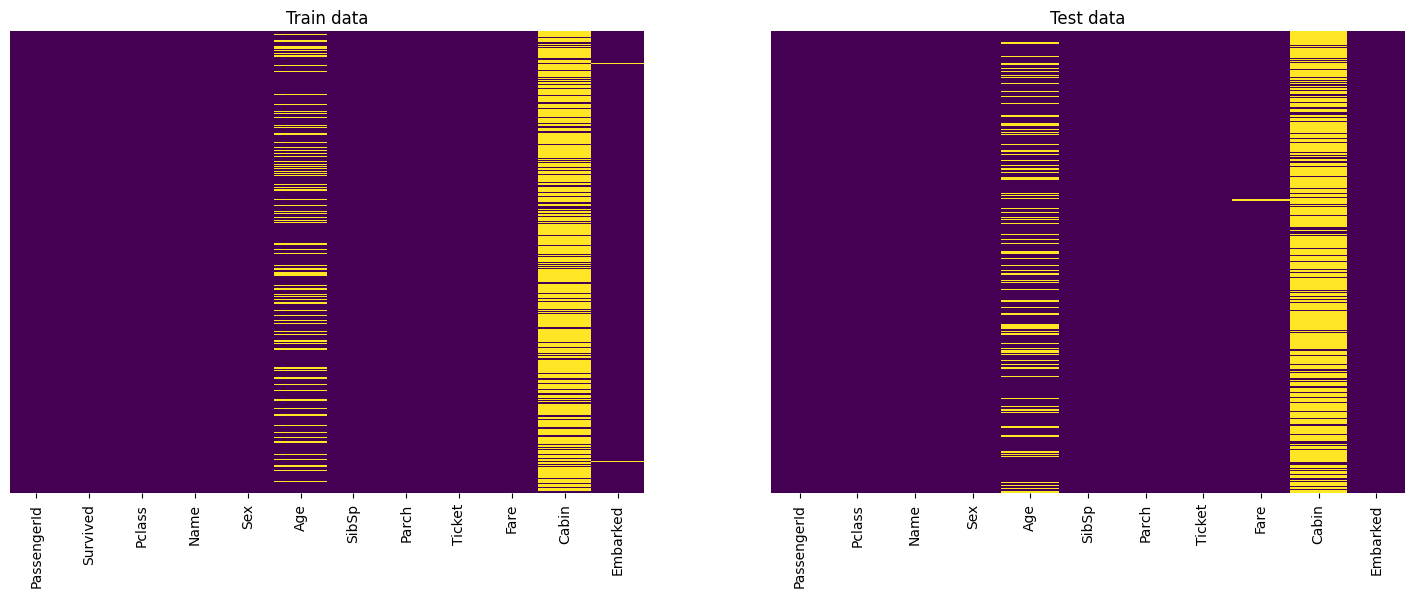

In [8]:
# checking for the null values
# train data
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))
sns.heatmap(train.isnull(), yticklabels=False, ax = ax[0], cbar=False, cmap='viridis')
ax[0].set_title('Train data')
# test data
sns.heatmap(test.isnull(), yticklabels=False, ax = ax[1], cbar=False, cmap='viridis')
ax[1].set_title('Test data');

In [14]:
# embarked feature in train
train.Embarked.value_counts()
train.Embarked= train.Embarked.replace(np.nan,Counter(train.Embarked).most_common(1)[0][0])

In [15]:
# fair feature in test
class3_mean = train[train['Pclass']==3]['Fare'].mean()
test['Fare'] = test['Fare'].replace({np.nan:class3_mean})

In [20]:
# age feature in train and test
# defining a function 'impute_age'

# passing age_pclass as ['Age', 'Pclass']
def impute_age(age_pclass):
    # Passing age_pclass[0] which is 'Age' to variable 'Age'
    Age = age_pclass[0]
    # Passing age_pclass[2] which is 'Pclass' to variable 'Pclass'
    Pclass = age_pclass[1]
    #applying condition based on the Age and filling the missing data respectively 
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age

In [21]:
# filing the missing data in Age

# (for train) grab age and apply the impute_age, our custom function
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
# (for test) grab age and apply the impute_age, our custom function 
test['Age'] = test[['Age','Pclass']].apply(impute_age,axis=1)

C:\Users\ARNAB ADHIKARY\AppData\Local\Temp\ipykernel_38688\166580316.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = age_pclass[0]
C:\Users\ARNAB ADHIKARY\AppData\Local\Temp\ipykernel_38688\166580316.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = age_pclass[1]
C:\Users\ARNAB ADHIKARY\AppData\Local\Temp\ipykernel_38688\166580316.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = age_pclass[0]
C:\Users\A

In [22]:
# cabin feature in train and test

#Train:
train.loc[train['Cabin'].notnull(), 'Cabin'] =1
train['Cabin'] = train['Cabin'].replace({np.nan:0})
train['Cabin'] = train['Cabin'].astype(int)
#Test:
test.loc[test['Cabin'].notnull(), 'Cabin'] =1
test['Cabin'] = test['Cabin'].replace({np.nan:0})
test['Cabin'] = test['Cabin'].astype(int)

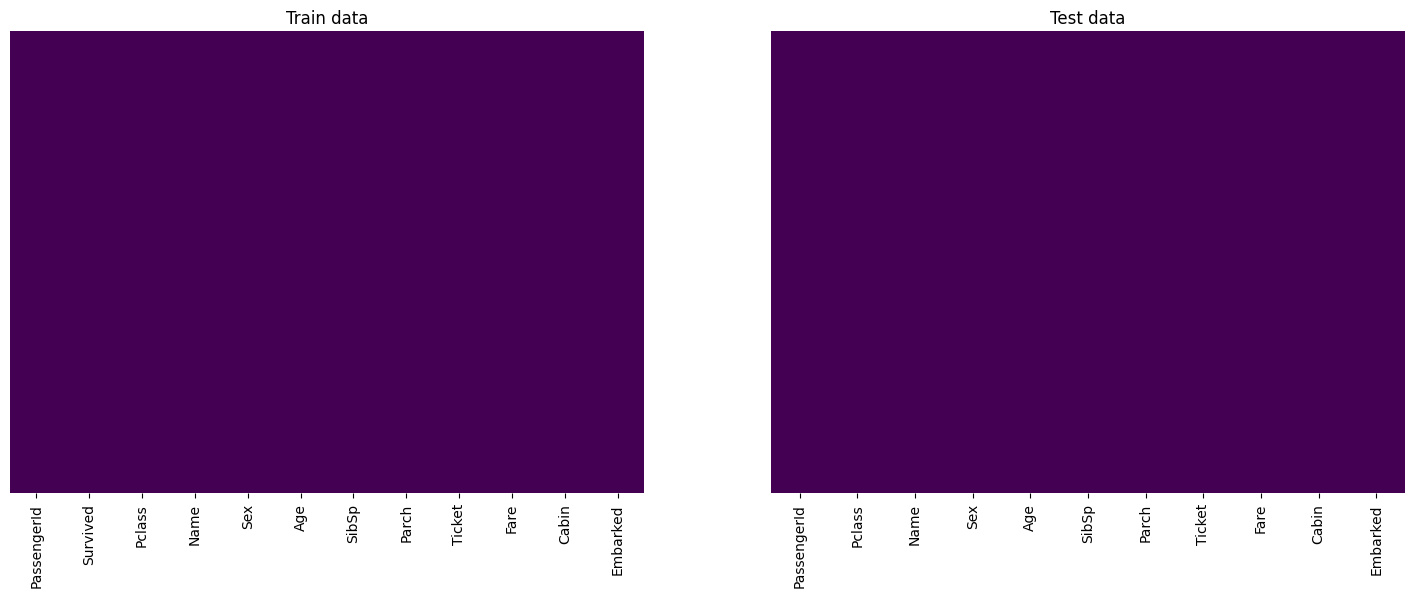

In [23]:
# now again looking at the heatmap

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 6))
sns.heatmap(train.isnull(), yticklabels=False, ax = ax[0], cbar=False, cmap='viridis')
ax[0].set_title('Train data')
sns.heatmap(test.isnull(), yticklabels=False, ax = ax[1], cbar=False, cmap='viridis')
ax[1].set_title('Test data');

In [24]:
# feature engineering

# Train
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
train = pd.concat([train, sex,embark],axis=1)
train=train.drop(['Sex','Embarked'], axis=1)
train.rename(columns={"male": "sex_male", "Q": "Embarked_Q","S": "Embarked_S"}, inplace=True)
# Same for the Test

In [25]:
# model preparation
features_drop = ['PassengerId','Name', 'Ticket', 'Survived']
selected_features = [x for x in train.columns  if x not in features_drop ]
X_train = train[selected_features]
y_train = train['Survived']